<a href="https://colab.research.google.com/github/KevinLopess/sistemas_inteligentes/blob/main/Trab1_SistemasInteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 45.7MB/s]


In [ ]:
! unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [ ]:
from numpy import genfromtxt
dataset = genfromtxt('healthcare-dataset-stroke-data.csv', delimiter=',' , skip_header=1 ,usecols=(-4,-10,-3))
#-3

In [ ]:
dataset[np.isnan(dataset)] = 0
print(dataset[:10,:])

[[228.69  67.    36.6 ]
 [202.21  61.     0.  ]
 [105.92  80.    32.5 ]
 [171.23  49.    34.4 ]
 [174.12  79.    24.  ]
 [186.21  81.    29.  ]
 [ 70.09  74.    27.4 ]
 [ 94.39  69.    22.8 ]
 [ 76.15  59.     0.  ]
 [ 58.57  78.    24.2 ]]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 0
y = dataset[:,2]
mse_random_list = []
mae_random_list = []

for i in range (0,10):
  w1 = np.random.randn();
  w2 = np.random.randn();
  b = np.random.randn();
  y_pred = w1*dataset[:,0] + w2*dataset[:,1] - b;
  mse_random_list.append(mean_squared_error(y,y_pred))
  mae_random_list.append(mean_absolute_error(y,y_pred))


124.47600081310436
195.18495943802273
42.22192574639125
58.15515773355332
56.93572262000864
145.59954818162265
65.81014049901475
93.1086949703434
158.22373230346318
178.84334288689638
[144.4163209502305 22996.529929584995
 array([-235.82019398, -209.56217113, -138.14760961, ...,  -91.93923611,
        -172.84593032,  -99.21091748])                                  ]


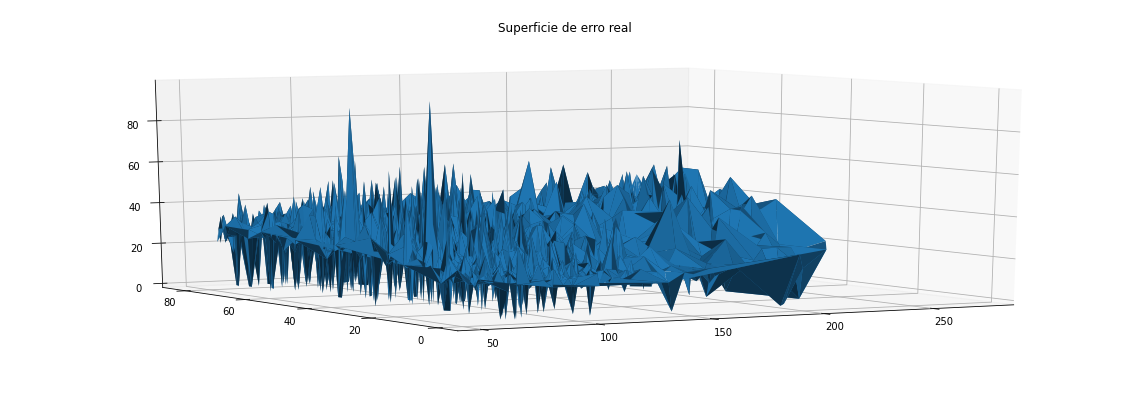

In [ ]:
#BLOCO DO GRAFICO COM Y VERDADEIRO
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(dataset[:,0], dataset[:,1], y)

ax.view_init(elev=10, azim=-120)
plt.title ('Superficie de erro real')
plt.show()

In [ ]:
points2D = np.vstack([dataset[:,0],dataset[:,1]]).T
from scipy.spatial import Delaunay

tri = Delaunay(points2D)
simplices = tri.simplices

import plotly.figure_factory as ff

fig = ff.create_trisurf(dataset[:,0], dataset[:,1], y, simplices=simplices, aspectratio=dict(x=1, y=1, z=0.3),title='Superficie de erro real')
fig.show()

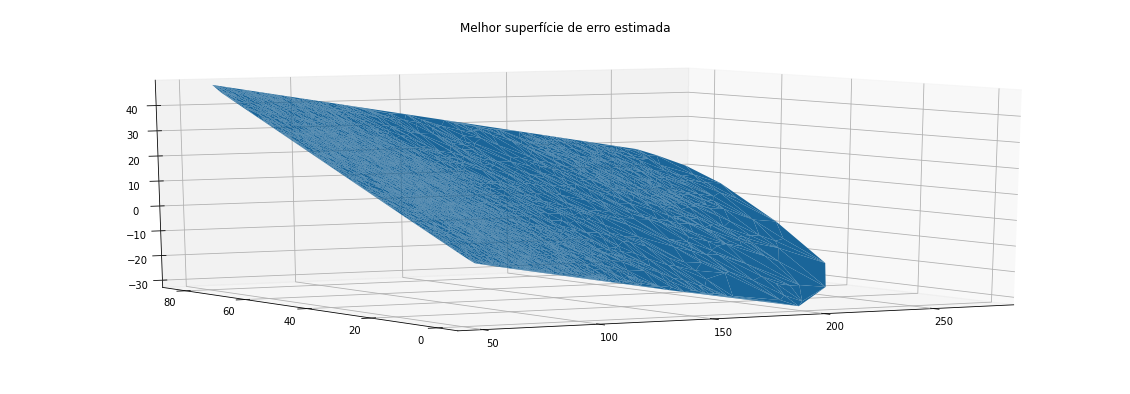

In [ ]:
# BLOCO DO GRAFICO COM MELHOR ERRO

fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(dataset[:,0], dataset[:,1], y_pred)

ax.view_init(elev=10, azim=-120)
plt.title ('Melhor superfície de erro estimada')
plt.show()

In [ ]:
points2D = np.vstack([dataset[:,0],dataset[:,1]]).T
from scipy.spatial import Delaunay

tri = Delaunay(points2D)
simplices = tri.simplices

import plotly.figure_factory as ff

fig = ff.create_trisurf(dataset[:,0], dataset[:,1], y_pred, simplices=simplices, aspectratio=dict(x=1, y=1, z=0.3),title='Melhor superfície de erro estimada')
fig.show()